In [2]:
#Versão do python no notebook
from platform import python_version
print(python_version())

3.9.13


# Instalando pacote watermark no Notebook:

In [3]:
!pip install -q -U watermark

# Carregando Pacotes:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [5]:
%reload_ext watermark
%watermark -a "DSA" --iversions

Author: DSA

pandas    : 1.4.4
matplotlib: 3.5.2
numpy     : 1.21.5
seaborn   : 0.11.2



# Carregando Dados:

In [6]:
dadosRH = pd.read_csv("dadosRH.csv")

In [7]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [9]:
dadosRH.shape

(54808, 11)

# Exploração e Limpeza dos Dados:

In [12]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [14]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

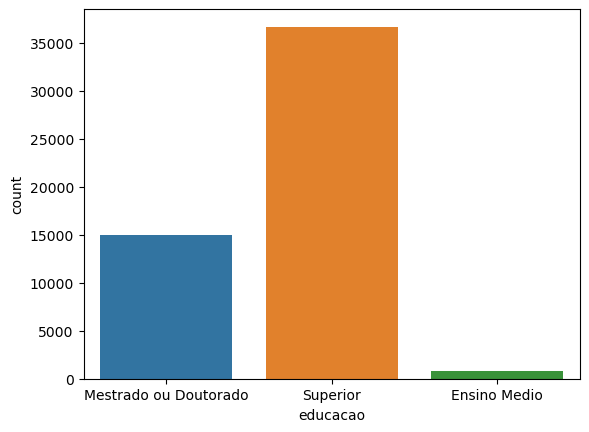

In [15]:
sns.countplot(dadosRH['educacao'])

In [16]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

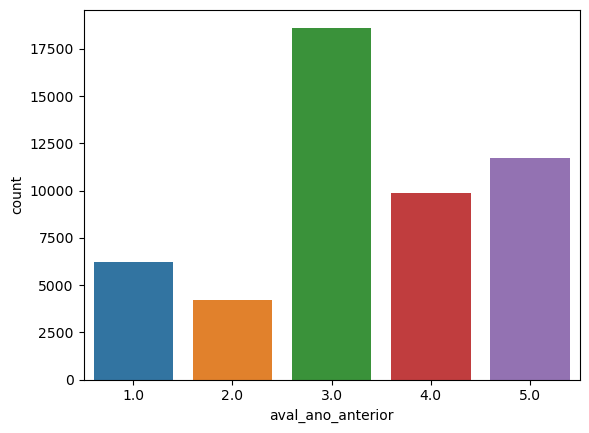

In [17]:
sns.countplot(dadosRH['aval_ano_anterior'])

## Aplicar técnica da imputação para lidar com os valores nulos

Com a moda:

In [18]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True )

Com a mediana:

In [19]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True )

Verificando se ainda tem valores nulos:

In [20]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

## Exemplo de Balanceamento de Classes:

In [23]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

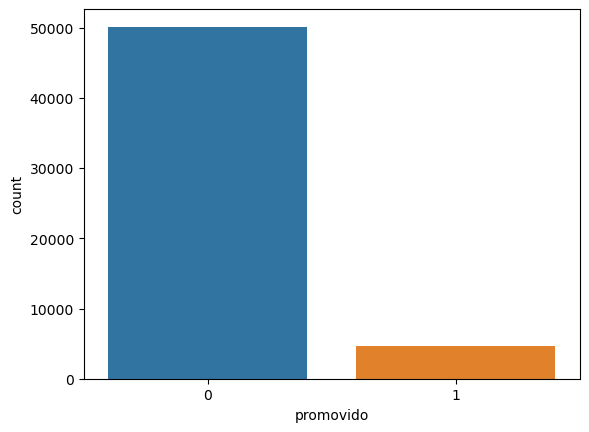

In [24]:
sns.countplot(dadosRH['promovido'])

In [25]:
df_promovidos_majoritario = dadosRH[dadosRH.promovido == 0]
df_promovidos_minoritario = dadosRH[dadosRH.promovido == 1]

In [26]:
df_promovidos_majoritario.shape

(50140, 11)

## Upsample

In [27]:
from sklearn.utils import resample
df_promovidos_minoritario_upsample = resample(df_promovidos_minoritario, replace = True, n_samples = 50140, random_state = 150)

In [28]:
dadosRH_balanceados = pd.concat([df_promovidos_majoritario,df_promovidos_minoritario_upsample])

In [29]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [30]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

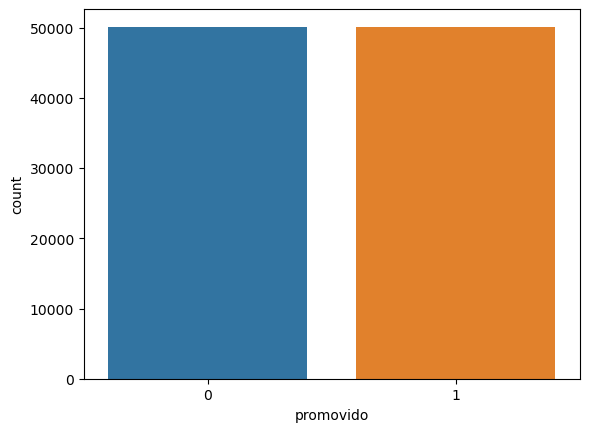

In [32]:
sns.countplot(dadosRH_balanceados['promovido'])

## Salvando dataset modificado:

In [33]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

In [34]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [35]:
dataset.shape

(100280, 11)

# Pergunta 1: Qual a Correlação entre os Atributos dos Funcionários?

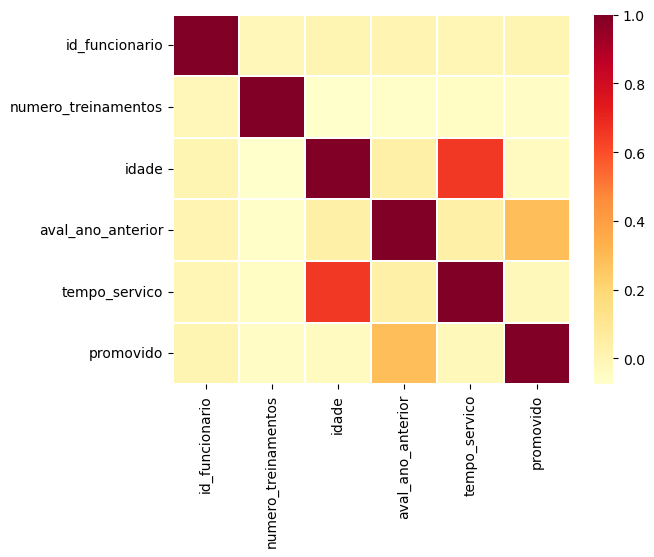

In [36]:
corr = dataset.corr()
sns.heatmap(corr, cmap="YlOrRd", linewidths = 0.1)
plt.show()

# Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


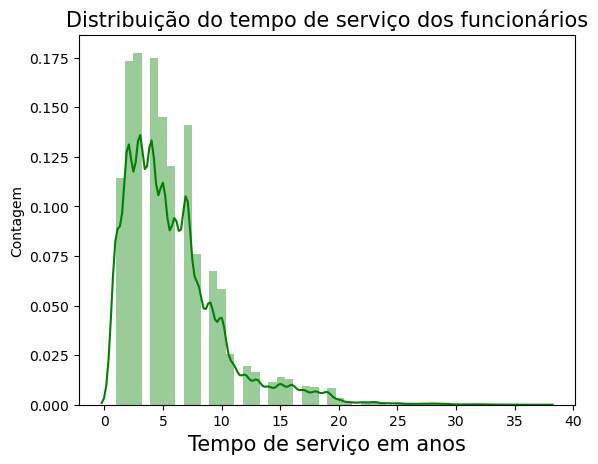

In [40]:
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title("Distribuição do tempo de serviço dos funcionários", fontsize = 15)
plt.xlabel("Tempo de serviço em anos", fontsize = 15)
plt.ylabel("Contagem")
plt.show()

# Pergunta 3 - Qual Avaliação do Ano Anterior foi a mais Comum?

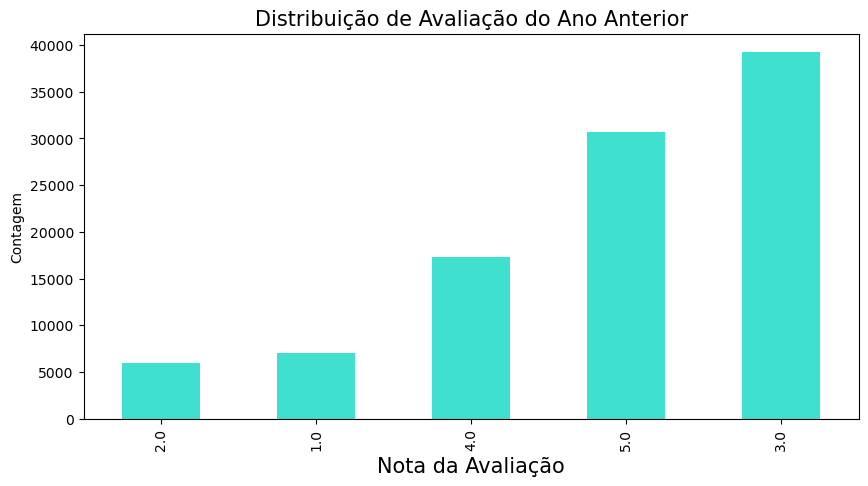

In [45]:
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'turquoise',figsize = (10,5))
plt.title("Distribuição de Avaliação do Ano Anterior", fontsize = 15)
plt.xlabel("Nota da Avaliação", fontsize = 15)
plt.ylabel("Contagem")
plt.show()

# Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


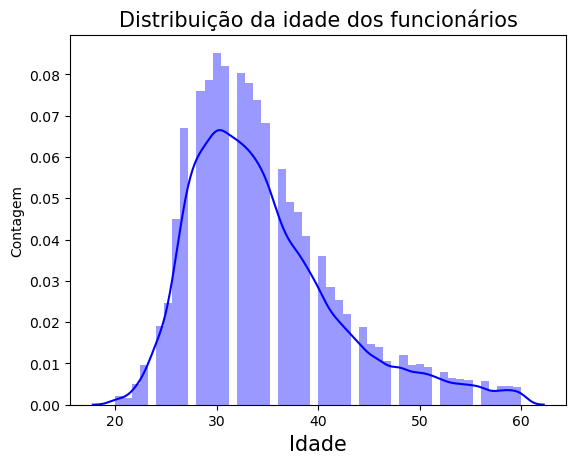

In [47]:
sns.distplot(dataset['idade'], color = 'blue')
plt.title("Distribuição da idade dos funcionários", fontsize = 15)
plt.xlabel("Idade", fontsize = 15)
plt.ylabel("Contagem")
plt.show()

# Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

C:\Users\guilherme.soares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


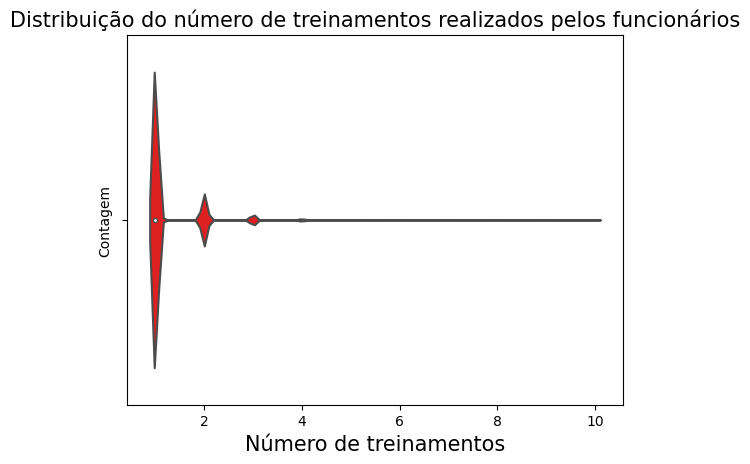

In [48]:
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title("Distribuição do número de treinamentos realizados pelos funcionários", fontsize = 15)
plt.xlabel("Número de treinamentos", fontsize = 15)
plt.ylabel("Contagem")
plt.show()

# Pergunta 6 - Qual a Proporção dos Funcionários por Canal de Recrutamento?

In [50]:
dataset.groupby(['canal_recrutamento']).count()
#Value_counts também é válido de usar aqui no lugar de groupby + count

,id_funcionario,departmento,regiao,educacao,genero,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
canal_recrutamento,,,,,,,,,,
Indicado,2547,2547,2547,2547,2547,2547,2547,2547,2547,2547
Outro,55375,55375,55375,55375,55375,55375,55375,55375,55375,55375
Outsourcing,42358,42358,42358,42358,42358,42358,42358,42358,42358,42358


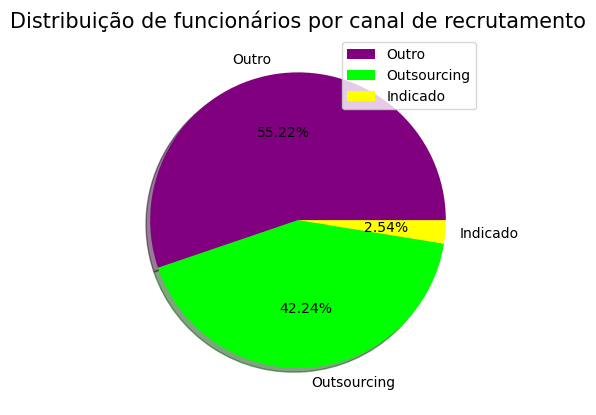

In [57]:
dataset['canal_recrutamento'].value_counts()
fatias = [55375,42358, 2547]
labels = "Outro","Outsourcing", "Indicado"
colors = ["purple","lime","yellow"]
explode = [0,0,0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title("Distribuição de funcionários por canal de recrutamento", fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

# Pergunta 7 - Qual a relação entre a promoção e a avaliação do ano anterior?

In [58]:
tabela_cruzada = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
tabela_cruzada

promovido,0,1
aval_ano_anterior,,
1.0,6135,878
2.0,4044,1937
3.0,21048,18223
4.0,9093,8264
5.0,9820,20838


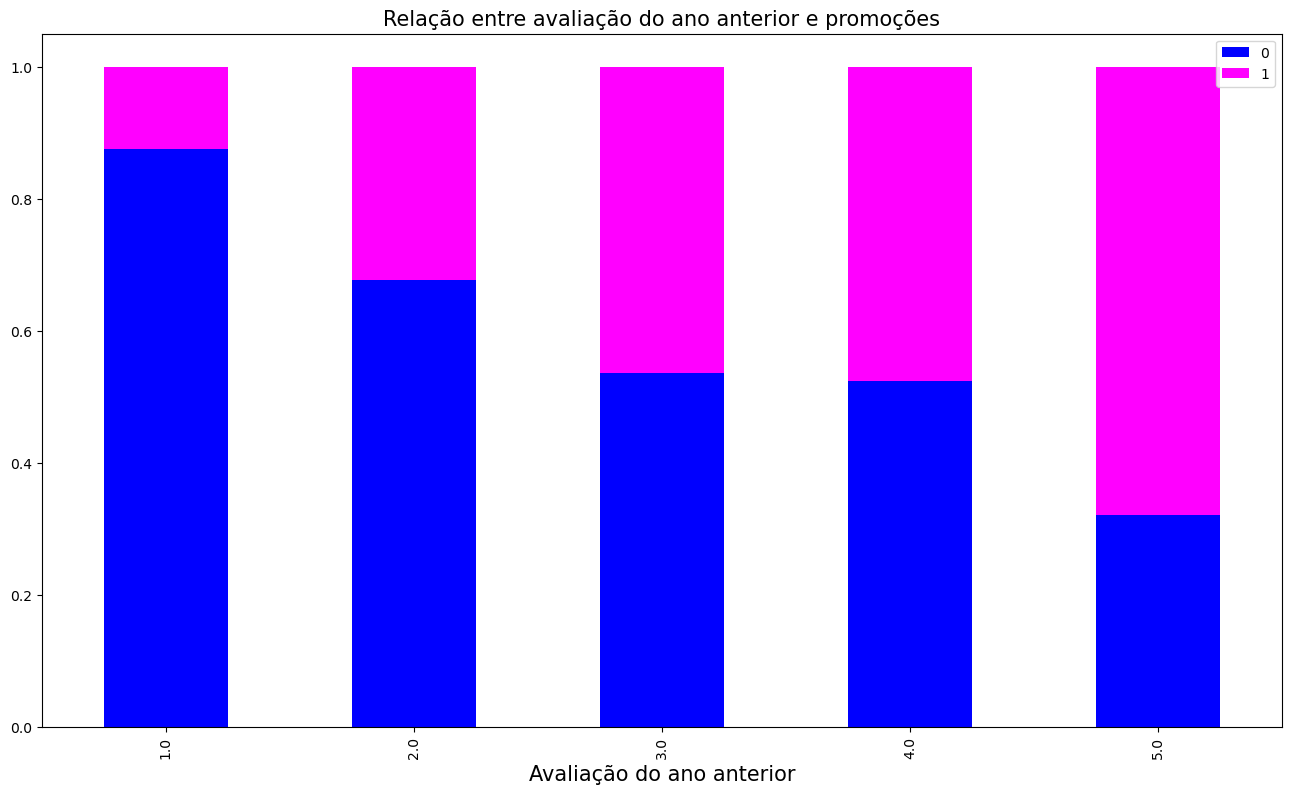

In [59]:
tabela_cruzada.div(tabela_cruzada.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, 
                                                                       figsize = (16,9), 
                                                                       color = ['blue','magenta'])
plt.title("Relação entre avaliação do ano anterior e promoções", fontsize = 15)
plt.xlabel("Avaliação do ano anterior", fontsize = 15)
plt.legend()
plt.show()